# Random Forest

- Se entrenan varios árboles, cada uno con un subconjunto de entrenamiento
- Cada subconjunto de entrenamiento tiene el mismo tamaño que el dataset original, pero las observaciones son sampleadas del dataset original con reemplazo.
- En cada split, se evalúan solo algunos predictores tomados al azar para buscar el mejor criterio de corte.
- Como salida se toma el promedio de las salidas de los árboles entrenados

In [9]:
% load_ext autoreload
% autoreload 2
import helper_DT
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
def generate_gaussians(N0,N1,mu0,mu1,s):
    # N1: Cantidad de personas
    sigma=[[s,0],[0,s]]
    np.random.seed(231)
    X=np.vstack([np.random.multivariate_normal(mu0, sigma,N0),np.random.multivariate_normal(mu1, sigma,N1)])
    y=np.hstack([np.zeros(N0),np.ones(N1)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
    return X_train, X_test, y_train, y_test


In [18]:
def gen_RF_tree(X_train, y_train, X_test, y_test,
             n_estimators=20,
             criterion="entropy",
             max_depth=None, 
             min_samples_split=2,
             min_samples_leaf=1,
             min_weight_fraction_leaf=0.,
             max_features=None,
             max_leaf_nodes=None,
             min_impurity_decrease=0.):
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                     criterion=criterion,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     min_weight_fraction_leaf=min_weight_fraction_leaf,
                                     max_features=max_features,
                                     max_leaf_nodes=max_leaf_nodes,
                                     min_impurity_decrease=min_impurity_decrease
                                     )
    clf = clf.fit(X_train, y_train)
    print("Train Score: {}".format(clf.score(X_train,y_train)))
    print("Test Score: {}".format(clf.score(X_test,y_test)))
    helper_DT.plotBoundaryDT(X_train,y_train,X_test,y_test,clf,N=500)

In [19]:
X_train, X_test, y_train, y_test=generate_gaussians(N0=1000,N1=1000,mu0=[2,5],mu1=[3,3],s=2)

Train Score: 0.9955223880597015
Test Score: 0.746969696969697


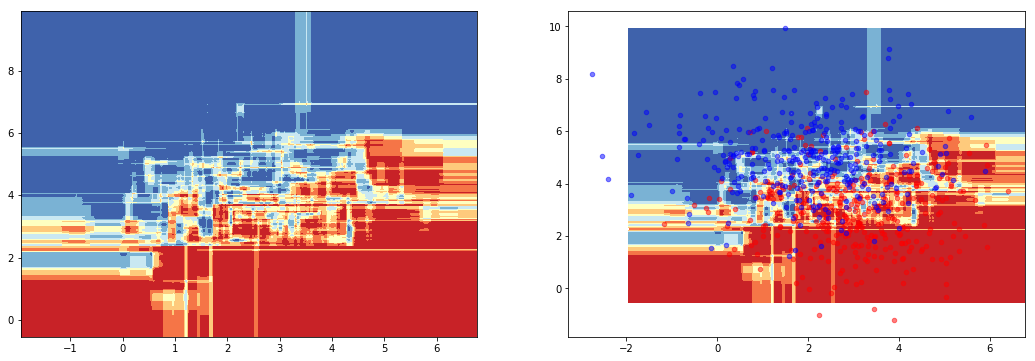

In [20]:
gen_RF_tree(X_train, y_train, X_test, y_test)

In [22]:
#Búsqueda de hiperparámetros
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['entropy', 'gini'],
              'max_depth': [None, 30, 20, 10],
              'min_samples_split':[2,4,8],
              'min_samples_leaf':[1,2,4,8],
              'min_weight_fraction_leaf':[0.,0.01, 0.02],
              'max_features':[None,1],
              'max_leaf_nodes':[None,50,100],
              'min_impurity_decrease':[0.,0.05,0.1] 
            }
trees= RandomForestClassifier()
clf = GridSearchCV(trees, param_grid, cv=4,verbose=1,n_jobs=-1)
clf.fit(X_train,y_train)

Fitting 4 folds for each of 5184 candidates, totalling 20736 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 30, 20, 10],
     

In [23]:
import pandas as pd
df=pd.DataFrame(clf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,param_min_weight_fraction_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.194383,0.032599,0.002087,0.000126,entropy,None,None,None,0,1,2,0,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.723214,0.758209,0.740299,0.742515,0.741045,0.012412,3349
1,0.154013,0.030871,0.002018,0.000088,entropy,None,None,None,0,1,2,0.01,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.720238,0.764179,0.785075,0.778443,0.761940,0.025278,1533
2,0.129728,0.016261,0.001990,0.000057,entropy,None,None,None,0,1,2,0.02,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.729167,0.767164,0.791045,0.793413,0.770149,0.025835,984
3,0.119086,0.012456,0.001971,0.000045,entropy,None,None,None,0,1,4,0,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.699405,0.743284,0.749254,0.745509,0.734328,0.020316,4982
4,0.111044,0.002117,0.001920,0.000052,entropy,None,None,None,0,1,4,0.01,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.717262,0.764179,0.779104,0.775449,0.758955,0.024739,1683


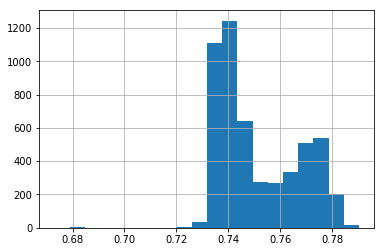

In [29]:
df["mean_test_score"].hist(bins=20)

In [27]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 1,
 'max_leaf_nodes': 50,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.02}

In [28]:
clf.best_score_

0.7902985074626866

In [32]:
clf.best_estimator_.feature_importances_

array([0.27571292, 0.72428708])

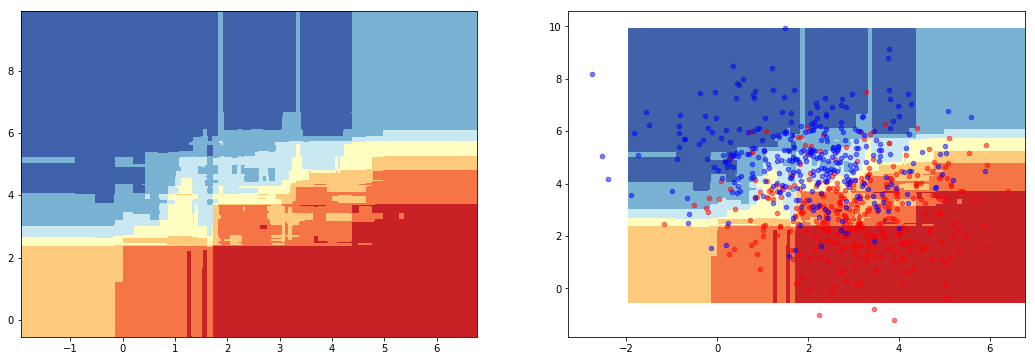

In [30]:
helper_DT.plotBoundaryDT(X_train,y_train,X_test,y_test,clf.best_estimator_,N=500)